# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
1.	In many iterations, the smartcab ran a red light. 
2.	In many iterations, the smartcab took a random action which did not confine with the waypoint. 
3.	Sometimes the smartcab went to the correct waypoint 
4.	At iteration 103, or 83 seconds after the deadline, the smartcab finally reached its destination.

Resubmit:
In this simulation, the agent did not move at all. The rewards and penalties are only affected because of the changes in the streetlights. For example, staying at a red light gave a reward of 1.35 while idling at a green light with no oncoming traffic resulted in a penalty of 4.41. This simulation most likely never ends because the smartcab is not enforced to meet the deadline nor does it ever reach the destination. Also, looking at the code in environment.py, it was evident that the rewards differ for each iteration because the reward is initialized by a random value, and a constant is added or subtracted with each choice (for instance, -1 for ideling on a green light  with no oncoming traffic ). 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1. Agent.py:
The three flags are learning, epsilon, and alpha
'learning' sets whether the agent is expected to learn. 
2. environment.py
When a simulation starts, the run() function in agent.py initializes the environment '__init__' and calls the functions 'create_agent' and 'set_primary_agent'. When the agent takes an action, the function 'step' is taken
3. simulator.py
THe render_text() function creates the simulation on the terminal with text, while the render() function uses pygame to create a GUI display of the simulation.

4. planner.py
The 'next_waypoint()' function considers the East-West direction first. 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


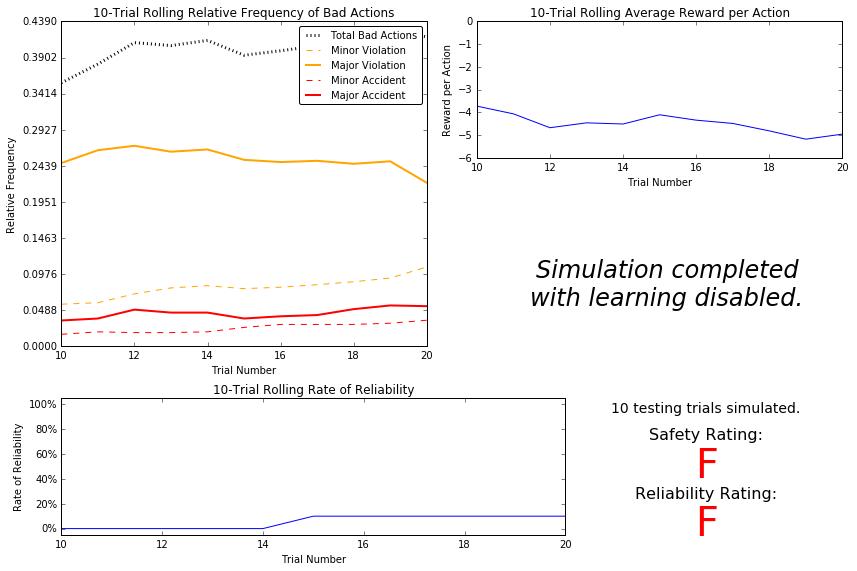

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
 
Overall, the safety and reliabiity rating was an F, suggesting that the smartcab did not arrive in time nor was it following the safety rules in the environment.

1. The driving agent makes bad decisions about 33% ~ 39% of the time. Out of these bad decisions, roughly 0.045% ~ 0.07% resulted in major accidents with minor accidents occuring less frequently at about 0.02% ~ 0.045%.
2. Since there are four decisions to be made and the driver is basically choosing randomly out of the 4, the correct decision is expected to be made about 25% of the time. In that sense, the 20% reliability rate makes sense. 
3. The reward ranges from -5 to -4 on each step . This suggests that the driver was penalized heavily at every trial.
4. As the number of trials increase, the outcome of results still stay stagnant for all three charts. 
5. Unless one is seeking an adrenaline rush from the danger, most passengers would not want to ride this smartcab for its lack of reliability and safety. It would be hard to come up with a selling point for a smartcab that makes bad decisions 1/3 of the time, resulting in a violation or accident and arrives at the destination in time about 1/5 of the time at most. 



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
I chose three states, namely a combination of inputs that are activated by the inputs, whether or not the smartcab has arrived at the destination and whether or not there is more time. To put it simply, the first feature is a combination of the streetlight (red or green) and the direction in which the cars are coming from (left, right, oncoming, or none). This makes it easier to identify the situation at the intersection and the actions that are allowed and optimal. The second and third states are important as a combination because if the smartcab is at the destination in time, it can be rewarded while if it is not at the destination and out of time, it will get a penalty. 
Updated Answer: After going through the “Implement the Q-Learning Algorithm” section, it was evident that the states I came up with were not ideal for this project. I continued to use the first feature, which was the combination of inputs that were present in that state. However, I did change the way in which the inputs were included into the states, namely by copying all of the inputs rather than copying only the activated inputs. Furthermore, I discarded the second and third features and added the waypoint as a state. It was evident that in this smartcab environment, waypoint was an important state since taking an action that is the same as the waypoint should result in a higher Q-score. 

Resubmit:
Although subject to change later on, it seems that the inputs generated from the environment('waypoint', 'inputs') can be directly used as the states, with the exception of deadline. Waypoint is important because we'd like the smartcab to run in the same direction as the waypoint to increase reliability. The inputs (oncoming car, right car, left car and light color) are important to increase the safety levels because the smartcab should make the right decision based on whether there are cars coming from each direction and the color of the streetlight. 
Finally, I thought it better to exclude deadline because the amount of state spaces increases significantly if it is included. For example, let's say the initial deadline is 23 and the smartcab makes a initial decision that should be rewarded, say, ideling on a red light. On the next iteration, when the deadline become 22 and there is a red light, the agent would not be able to access the previous reward simply because the deadline is different and the states would differ. 

Resubmit(2):
After reading the project review, I changed the state space to (streetlight, oncoming, left and waypoint). Right was excluded because no matter what right is, the decision should not be affected by it. For example, if the streetlight is green, the natural rule would be that the other direction in the intersection will be red (left to right). Therefore, the agent is able to go straight, left or right regardless of the state of the other car, as it is assumed that the car is idling. Of course, it would be a problem if the car on the right is running on a red light but that is more of an exception to the rule and thus a problem of reacting. Also, if the light was red, the agent is allowed to turn right regardless of the state of the car on the right(though it should learn that if a car on the left is going forward, it should stop).  


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
The states selected and the choices for the states are as follows: 
1. Light: red or green
2. right: right or None
3. left: left or None
4. oncoming: oncoming or None
5. waypoint: Right, Left , Forward

The total number of states is simply a multiplication of the amount of choices for each feature. 
2 * 2 * 2* 2 * 3 = 48. 

It seems that the driving agent could learn 48 policies with a reasonable number of training trials. 
This seems to be case since looking at the previous log, the deadline is usually around  20 to 35 steps (average 27.5), 
and even if we assume that each trial will average around 3/4 of that (approx. 21), the total amount of steps would be 21 times the number of trials. If we do 100 trails, the agent will take 2100 steps and it seems more than sufficient to learn 48 policies. 

However, one thing that may be subject to change is if there is a waypoint of None. In planner.py, it seems to be case that the waypoint of an agent that reached its destination is None. In this sense, None is also a waypoint choice but it also seems inefficient to have a combination of states that include None as a waypoint in each step. We want the smartcab to choose None only based on the surrounding environment and not the waypoint, so I will exclude it for now. 

Resubmit:
The states selected are as follows: 
1. Light: red or green
2. left: Right, Left , Forward or None
4. oncoming: Right, Left , Forward or None
5. waypoint: Right, Left , Forward
Therefore the number of policies is  2* 4* 4*4 =128 policies. 

Resubmit(2):
The number of policies is 2 * 4 * 4 * 3 = 96 policies.



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

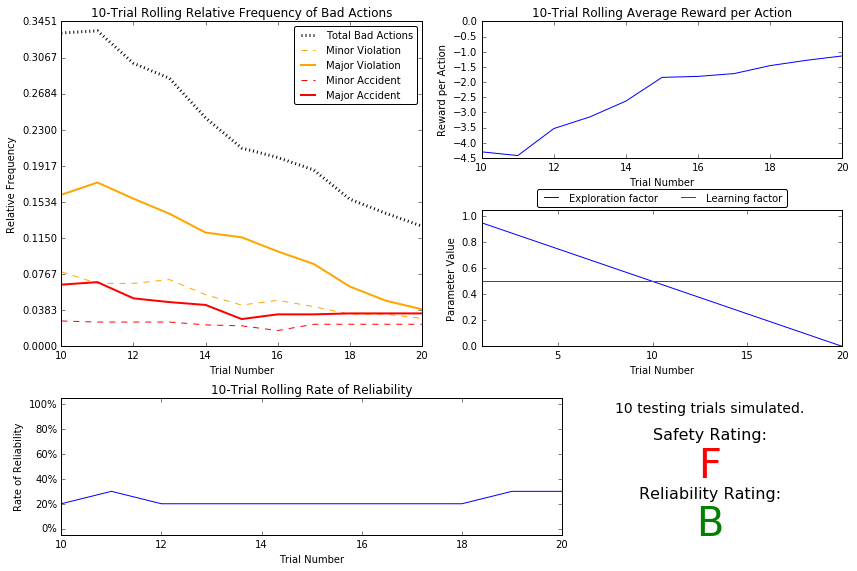

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The overall result was that the agent scored an F in Safety and B in reliability rating. 
Compared to the basic driving agent, the learning agent's charts were less stagnant.
For instance, the average reward per action and the relative frequency of bad actions both decreased over time. 
This suggests that the agent is now learning and becoming "smarter" overtime as more trials continue to update the Q-values. 

There were 20 training trials and 10 testing trials, which seems too little because looking at the Q-table, the agent did not explore enough of the state-action pairs. 

With regards to epsilon, there seems to be a mistake in the initial code I ran here since epsilon starts at 0.2 but decreases to 0 in merely 1 trial. It seems that I would need to readjust the code to make the epsilon gradually decrease over the training trials and become 0 during testing. 


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

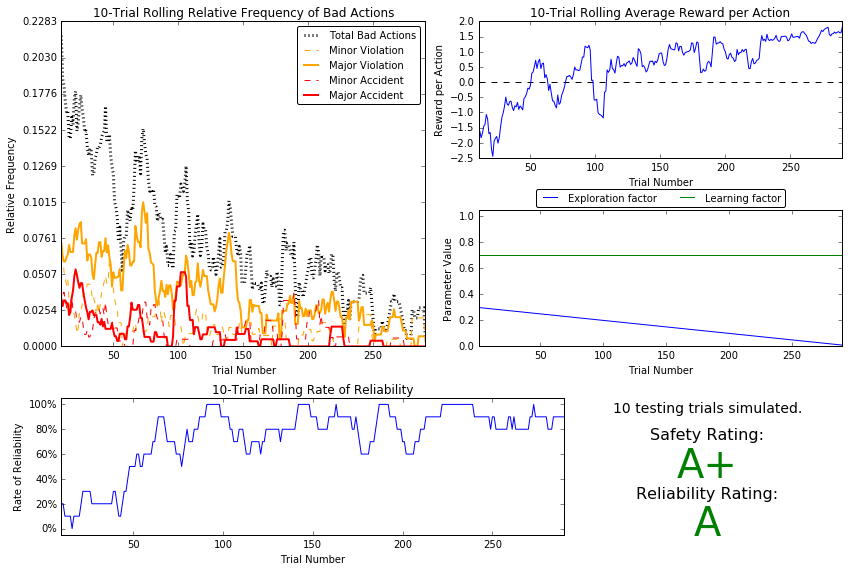

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The learning agent did significantly better after improving the learning agent. In fact, the safety grade was an A+ and the reliability grade was an A with only one trial where the driver did not arrive at the destination in time. 
The first change I made was in the state spaces. I realized that the safety grade was unreasonably low in the beginning so I changed the state space from one with all the inputs and the waypoint to the following update state spaces:
1. just red if the input reads the streetlight as red
2. the rest of the inputs + the waypoint if the streetlight is green.

This allowed the agent to value the action 'None' when the light is red instead of having to learn all the different combinations of a red light and other inputs. For example, before, the agent had to learn 'red, forward, left, right, waypoint:right' separately from 'red, forward, left, right, waypoint:left'. Looking at the log text files, the state space was reduced from 184 to 159 and the results were evidently much better. 

Also, I fixed the problem I had in Question 6 which was the decaying factor epsilon. I used a simple decaying factor equation which decreases by 0.001 each trial, and a starting epsilon factor of 0.2. This allowed for the agent to have 190 training trials before starting the testing trial. I also used an alpha factor of 0.7because this value worked well when I attempted the smartcab project in the older format before. It seems that a relatively high learning rate of 0.7 allows for the agent to learn the environment quickly and 'graduate' to the testing trials with a reasonable level of accuracy and safety. 

Overall, I am satisfied with this learning agent because this idea of a smartcab is new and the customers would want a guarantee of both safety and reliability, but with more of an emphasis on safety. The smartcab did not make any traffici violations or accidents in the testing trial, which is almost required when talking about an autonomous vehicle. In other words, the risk factor of causing an accident is much higher than an autonomous taxi that doesn't arrive on time. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
Expected Optimal Policy:
1. State: {Light:red} ==> Action: None
2. State: {Light:green, waypoint:left, oncoming:right} ==> Action:None(since the oncoming car wants to turn right)

Policy from the Logs
1. None has the highest Q-value with  2.53 while the others are all negative

2. 
 a. ('green', 'left', None, 'right', 'left') the optimal action for this was None with a Q-value of 1.23. 'left' was the lowest.
 b. ('green', 'right', None, 'right', 'left') had right as the optimal policy with forward as the lowest. 
 c. ('green', 'forward', None, 'right', 'left') had forward as the highest with the other unexplored
 d. ('green', 'right', 'right', 'right', 'left') had forward as the highest with the other unexplored
 e. ('green', 'forward', 'left', 'right', 'left') had forward as the highest with others unexplored
 f. ('green', None, 'forward', 'right', 'left') had forward as the highest with others unexplored. 
 g. ('green', 'right', 'forward', 'right', 'left') had forward as the highest with others unexplored. 
h.  ('green', None, 'left', 'right', 'left') had forward as the highest with others unexplored. 
i. . ('green', None, None, 'right', 'left') had forward as the highest with others unexplored. 
j. . ('green', 'left', 'forward', 'right', 'left')had forward as the highest with others unexplored. 

From the observations it was evident that when the waypoint was left and the optimal policy should be None based on the fact that an oncoming car is also trying to turn right, the optimal policy was reached only once out of ten. The other 9 were all suboptimal policies because they all guided in a direction different from the waypoint which is left. However, this is suboptimal because going left could cause an accident and so in this case, going left is the worst, None is optimal, and the rest are suboptimal. 

With regards to the first example, the agent has the highest Q-value for None on a red light, which is in line with the optimal policy.




Resubmit: (light, left, oncoming, waypoint)

Expected optimal policy
State of ('red', 'left':forward, waypoint:right) should have an optimal policy of None since there is a car coming  from the left through the intersection. An action of 'forward' and 'left' are bad policies because it is a red light, and 'right' can be considered a bad policy as well if strictly adhering to the safety rules. However, I believe it is sufficient to say 'right' is a suboptimal policy since it is normal for a car to turn right even when the left car is moving forward, as long as the left car is not going too fast or very close to crossing the intersection.  

Actual policy:
 ('red', 'forward', 'right', 'right')
 -- forward : -7.02
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 ('red', 'forward', None, 'right')
 -- forward : -9.81
 -- right : 2.43
 -- None : 0.00
 -- left : -6.59
 ('red', 'forward', 'left', 'right')
 -- forward : -6.56
 -- right : 1.57
 -- None : 0.00
 -- left : -27.95
 ('red', 'forward', 'forward', 'right')
 -- forward : -27.77
 -- right : -13.57
 -- None : 1.83
 -- left : 0.00
 
 This policy recommended 'right', the suboptimal policy, twice. One policy recommended 'None' once and the last one only penalized 'forward' while the other three actions were unexplored. This suggests that the policy for this state was suboptimal, or non-optimal if strictly adhering to the safety rules.
 

Expected Policy:
A state with a streetlight color of green, an oncoming car going forward, and a waypoint of 'left' should have an optimal policy of None. 

Actual policies:
('green', 'left', 'forward', 'left')
 -- forward : -0.01
 -- right : -0.03
 -- None : -0.06
 -- left : 1.24
('green', None, 'forward', 'left')
 -- forward : 0.47
 -- right : 0.74
 -- None : -3.18
 -- left : 1.37
('green', 'forward', 'forward', 'left')
 -- forward : 0.88
 -- right : 0.00
 -- None : -4.19
 -- left : -14.51
 ('green', 'right', 'forward', 'left')
 -- forward : 1.19
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

This policy chose 'left' as the policy with the highest Q-value twice and 'forward' twice. SInce the light is green, the suboptimal policy would be go to right or forward, since it is only going in the wrong direction without causing any accidents or violations. On the other hand, going 'left' would be non-optimal since there is a car coming through the intersection. In this sense, this policy was either non-optimal or suboptimal. 

The last example tests a streetlight color of green and a waypoint of 'right'. 
The optimal policy is to go right while the 'left' and 'forward' are suboptimal choices. 

('green', None, None, 'right')
 -- forward : 0.72
 -- right : 2.27
 -- None : -5.38
 -- left : 0.00
 ('green', 'left', 'forward', 'right')
 -- forward : -0.35
 -- right : 2.46
 -- None : 0.00
 -- left : 0.20
 ('green', 'forward', None, 'right')
 -- forward : 0.20
 -- right : 2.32
 -- None : 0.00
 -- left : 0.00
('green', None, 'right', 'right')
 -- forward : 1.81
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 ('green', 'right', 'forward', 'right')
 -- forward : -0.05
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 ('green', 'left', None, 'right')
 -- forward : 0.09
 -- right : 1.92
 -- None : 0.60
 -- left : 0.00
 ('green', 'left', 'right', 'right')
 -- forward : 1.14
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 ('green', 'left', 'right', 'right')
 -- forward : 1.14
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
('green', 'right', 'left', 'right')
 -- forward : 1.21
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
('green', None, 'left', 'right')
 -- forward : 0.00
 -- right : 1.35
 -- None : 0.00
 -- left : 0.77

('green', 'left', 'left', 'right')
 -- forward : 0.00
 -- right : 1.78
 -- None : 0.00
 -- left : 0.00
 ('green', 'forward', 'forward', 'right')
 -- forward : -0.28
 -- right : 2.16
 -- None : 0.00
 -- left : 0.00

('green', 'right', None, 'right')
 -- forward : -0.24
 -- right : 1.67
 -- None : -3.48
 -- left : 0.00
 ('green', 'forward', 'left', 'right')
 -- forward : 0.14
 -- right : 1.84
 -- None : 0.00
 -- left : -14.69
 ('green', None, 'forward', 'right')
 -- forward : 0.56
 -- right : 2.17
 -- None : 0.00
 -- left : 0.02
 ('green', 'forward', 'right', 'right')
 -- forward : 0.38
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
This example is an optimal policy because 11 out of 16 state-action pairs were optimal with an action of 'right' as the highest. The rest were suboptimal with a choice of 'forward' as the highest. 




Resubmit (3rd time): (light,oncoming, left,waypoint)
1. Expected optimal policy
State of ('red', 'left':forward, waypoint:right) should have an optimal policy of None
since there is a car coming  from the left through the intersection. An action of 
'forward' and 'left' are bad policies because it is a red light, and 'right' can be considered 
a bad policy as well if strictly adhering to the safety rules. However, I believe it is sufficient 
to say 'right' is a suboptimal policy since it is normal for a car to turn right even when the 
left car is moving forward, as long as the left car is not going too fast or very close to 
crossing the intersection.  

Actual policy:
('red', None, 'forward', 'right')
 -- forward : -27.67
 -- right : 0.00
 -- None : 1.42
 -- left : -27.88
('red', 'left', 'forward', 'right')
 -- forward : -39.30
 -- right : -14.07
 -- None : 1.61
 -- left : -27.37
 ('red', 'forward', 'forward', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 2.00
 -- left : 0.00
 ('red', 'right', 'forward', 'right')
 -- forward : -27.57
 -- right : 0.00
 -- None : 2.09
 -- left : -27.59
 It is evident that the agent acts optimally as it chooses None as the action to take in this situation. 
 
2. Expected Policy:
A state with a streetlight color of green, an oncoming car going forward, and a waypoint of 'left' should have an optimal policy of None. 

Actual policies:
('green', 'forward', None, 'left')
 -- forward : 1.29
 -- right : 0.16
 -- None : -4.89
 -- left : -18.19
 ('green', 'forward', 'right', 'left')
 -- forward : 0.00
 -- right : 0.33
 -- None : 0.00
 -- left : -13.89
 ('green', 'forward', 'forward', 'left')
 -- forward : 1.07
 -- right : 0.96
 -- None : 0.00
 -- left : -13.56
('green', 'forward', 'left', 'left')
 -- forward : 0.65
 -- right : 0.49
 -- None : -3.81
 -- left : -17.85
 The agent acted suboptimally since the highest Q-values were either 'forward' or 'right'. The optimal action would have been None and the bad action would be 'left'(since it can cause an accident). Also, it was evident that the 'left' action had the lowest Q-value. 
 
 Finally, I checked the state space of a streetlight of red, and a waypoint that is not 'right'. This state should in theory have 'None' as the optimal policy and 'right' as the suboptimal policy. 
 Actual policies:
 ('red', 'left', 'right', 'forward')
 -- forward : -7.25
 -- right : 0.00
 -- None : 1.80
 -- left : 0.00

('red', 'left', 'left', 'left')
 -- forward : 0.00
 -- right : -13.91
 -- None : 1.85
 -- left : -7.55
 ('red', None, 'forward', 'forward')
 -- forward : -36.66
 -- right : -14.04
 -- None : 2.22
 -- left : -38.71
 ('red', 'right', 'forward', 'forward')
 -- forward : 0.00
 -- right : -13.44
 -- None : 2.02
 -- left : -36.57
 ('red', 'right', None, 'forward')
 -- forward : -9.22
 -- right : 0.00
 -- None : 1.56
 -- left : 0.00
 ('red', 'right', 'forward', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.60
 -- left : 0.00
 ('red', 'right', 'right', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : -27.72

('red', 'forward', None, 'left')
 -- forward : -10.07
 -- right : -0.21
 -- None : 2.26
 -- left : -15.54
 ('red', 'left', None, 'left')
 -- forward : -9.37
 -- right : 0.53
 -- None : 1.66
 -- left : -10.42
 ('red', 'forward', 'left', 'left')
 -- forward : -7.51
 -- right : 0.27
 -- None : 1.98
 -- left : -7.69
 ('red', 'right', 'right', 'left')
 -- forward : -6.50
 -- right : -13.80
 -- None : 0.00
 -- left : 0.00
 ('red', 'forward', 'right', 'left')
 -- forward : -6.49
 -- right : 0.00
 -- None : 1.30
 -- left : 0.00

('red', 'left', 'forward', 'forward')
 -- forward : -36.08
 -- right : 0.66
 -- None : 2.68
 -- left : -28.10

('red', None, 'right', 'left')
 -- forward : -10.50
 -- right : -13.76
 -- None : 2.37
 -- left : 0.00

('red', None, 'right', 'forward')
 -- forward : -7.03
 -- right : 0.00
 -- None : 1.56
 -- left : -9.65
 ('red', 'forward', 'forward', 'forward')
 -- forward : -28.59
 -- right : -0.06
 -- None : 1.80
 -- left : 0.00
 ('red', None, None, 'forward')
 -- forward : -10.14
 -- right : -13.20
 -- None : 1.21
 -- left : -10.34
 ('red', 'left', 'left', 'forward')
 -- forward : -28.54
 -- right : -3.75
 -- None : 2.29
 -- left : -36.75

('red', 'right', None, 'left')
 -- forward : -7.11
 -- right : -0.24
 -- None : 1.02
 -- left : -7.10
 ('red', 'left', None, 'forward')
 -- forward : -12.50
 -- right : -5.42
 -- None : 1.96
 -- left : -30.93
 ('red', None, 'forward', 'left')
 -- forward : -28.15
 -- right : 0.05
 -- None : 1.98
 -- left : -36.95
('red', 'forward', 'right', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.43
 -- left : 0.00
 ('red', None, 'left', 'left')
 -- forward : -16.17
 -- right : -14.15
 -- None : 2.18
 -- left : -16.05
 ('red', 'forward', 'left', 'forward')
 -- forward : -6.96
 -- right : 0.82
 -- None : 2.31
 -- left : -31.55

('red', 'right', 'left', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.95
 -- left : -6.89
 ('red', 'right', 'left', 'left')
 -- forward : 0.00
 -- right : -13.55
 -- None : 1.69
 -- left : 0.00

('red', 'left', 'forward', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 2.02
 -- left : -39.12
 ('red', None, None, 'left')
 -- forward : -10.74
 -- right : -14.91
 -- None : 2.01
 -- left : -17.60
('red', 'left', 'right', 'left')
 -- forward : -7.50
 -- right : -0.62
 -- None : 2.06
 -- left : 0.00

('red', 'forward', 'forward', 'left')
 -- forward : -36.98
 -- right : 1.56
 -- None : 0.00
 -- left : -36.47
 
It was evident that 28/30 of these policies recommended the optimal policy(None). The other two had a policy of (all except left) and (None and left), with all of the Q-values being 0. These two policies were a result of not exploring enough but compared to the previous submission, the number of these unexplored states decreased. This was most likely because I changed the epsilon value to 0.3 and so there were 290 training trials instead of 190. The safety and reliability scores were the same with A+ and A, respectively. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.